In [1]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("OPENAI_API_KEY")

In [2]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import SystemMessage, HumanMessage, RemoveMessage
from langchain_core.runnables import RunnableConfig
from langchain.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, START, END
from langgraph.graph import MessagesState

# Chamando o Langchain

In [3]:
llm = ChatOpenAI(model="gpt-4o", temperature=0) 


In [4]:
modelo_de_prompt = PromptTemplate(
    template="Me diga quais os impactos da IA no assunto {assunto}",
    input_variables=["assunto"]
)

In [5]:
cadeia = modelo_de_prompt | llm | StrOutputParser()

In [6]:
resposta = cadeia.invoke({"assunto": "Agricultura"})

In [7]:
print(resposta)

A inteligência artificial (IA) tem um impacto significativo na agricultura, trazendo uma série de benefícios e algumas preocupações. Aqui estão alguns dos principais impactos:

1. **Aumento da Produtividade**: A IA pode ajudar a aumentar a produtividade agrícola através da otimização de processos. Algoritmos de aprendizado de máquina podem analisar dados de solo, clima e culturas para recomendar práticas agrícolas mais eficientes.

2. **Agricultura de Precisão**: Sensores e drones equipados com IA podem monitorar campos em tempo real, permitindo que os agricultores apliquem água, fertilizantes e pesticidas de maneira mais precisa e apenas onde necessário, reduzindo custos e impactos ambientais.

3. **Gestão de Recursos**: A IA pode ajudar na gestão eficiente de recursos como água e energia, através de sistemas de irrigação inteligentes que ajustam automaticamente o uso de água com base nas condições climáticas e nas necessidades das plantas.

4. **Previsão de Colheitas**: Modelos predi

# Ferramentas

In [8]:
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.tools import tool
import os
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_openai import ChatOpenAI

In [9]:
def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("TAVILY_API_KEY")

In [10]:
@tool
def busca_web(query: str) -> list:
  """
  Busca na web por um termo específico. Use esta ferramenta para encontrar informações atualizadas sobre qualquer assunto.
  """
  tavily_search = TavilySearchResults(max_results=2, search_depth='advanced', max_tokens=1000)
  resultado_busca = tavily_search.invoke(query)
  return resultado_busca

In [11]:
busca_web('IA na Agricultura')

C:\Users\mborges\AppData\Local\Temp\ipykernel_19896\746746639.py:1: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  busca_web('IA na Agricultura')
C:\Users\mborges\AppData\Local\Temp\ipykernel_19896\1046159243.py:6: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily_search = TavilySearchResults(max_results=2, search_depth='advanced', max_tokens=1000)


[{'title': 'Inteligência artificial no agro: conheça 6 aplicações - Agrishow Digital',
  'url': 'https://digital.agrishow.com.br/artigos/inteligencia-artificial-no-agro-6-aplicacoes-que-voce-precisa-conhecer/',
  'content': '6 aplicações principais da IA no agro. Com a capacidade de processar grandes volumes de dados, aprender padrões complexos e tomar decisões, a IA',
  'score': 0.7407191},
 {'title': 'Tecnologias da informação e comunicação e suas relações com a ...',
  'url': 'https://www.embrapa.br/busca-de-publicacoes/-/publicacao/1012319/tecnologias-da-informacao-e-comunicacao-e-suas-relacoes-com-a-agricultura',
  'content': 'Resumo:Visando promover o intercâmbio de conhecimento e estabelecer a participação das novas tecnologias sobre a competitividade e a sustentabilidade da agricultura regional, a Embrapa Informática Agropecuária tomou a iniciativa de organizar a elaboração deste livro que trata do uso das tecnologias da informação e comunicação e suas relações com a agricultur

In [17]:
tools = [busca_web]

In [15]:
llm = ChatOpenAI(model="gpt-4o", temperature=0)


In [14]:
llm_com_ferramenta = llm.bind_tools(tools)

In [18]:

modelo_de_prompt = PromptTemplate(
    template="Usando apenas as tools disponíveis me diga quais os impactos da IA no assunto {assunto}",
    input_variables=["assunto"]
)

In [19]:
cadeia = modelo_de_prompt | llm_com_ferramenta | StrOutputParser()


In [21]:
resposta = cadeia.invoke({"assunto": "Agricultura"})
print(resposta)

In [22]:
prompt = """
    Usando apenas as tools disponíveis me diga quais os impactos da IA no assunto Agricultura
    """

In [23]:
resposta = llm_com_ferramenta.invoke(prompt)

In [24]:
print(resposta)

content='' additional_kwargs={'tool_calls': [{'id': 'call_vyJ78fpz0UmFnYIhKNRTeGjw', 'function': {'arguments': '{"query":"impactos da IA na agricultura"}', 'name': 'busca_web'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 77, 'total_tokens': 97, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BznyVV9DNAJRVUqsaknC0MD7oBKHX', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None} id='run--b2b31e65-a03d-4cea-9c6a-1062d87cad0e-0' tool_calls=[{'name': 'busca_web', 'args': {'query': 'impactos da IA na agricultura'}, 'id': 'call_vyJ78fpz0UmFnYIhKNRTeGjw', 'type': 'tool_call'}] usage_metadata={'input_tokens': 77, 'output_tokens': 20, 'total_tokens': 97, 'inpu

# Agente ReAct

In [26]:
from langgraph.prebuilt import create_react_agent

In [25]:
system_prompt = """ Atue como um assistente útil.
    Use as ferramentas fornecidas para responder às perguntas do usuário.
    - busca_web: Retorna os resultados de uma busca na web.
    Use a busca_web sempre que o usuário fizer uma pergunta sobre um tema específico e retorne o link dos artigos na resposta.
"""

In [27]:
agente_web = create_react_agent(model=llm, tools=tools, prompt=system_prompt)

In [28]:
resultado= agente_web.invoke({"messages": [("user", "Quais os impactos da IA na agricultura?")]})

In [29]:
resultado

{'messages': [HumanMessage(content='Quais os impactos da IA na agricultura?', additional_kwargs={}, response_metadata={}, id='63362db9-9d6b-4441-80df-2b05af90eec4'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_Y8ouHFVSqSyWzetSl1I2JjZ0', 'function': {'arguments': '{"query":"impactos da IA na agricultura"}', 'name': 'busca_web'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 128, 'total_tokens': 148, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-Bzo5YfmMWbxGhuloQ8Z4t29HEJZu7', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--85ca47ce-7dcb-4427-8e58-82ad29297f99-0', tool_calls=[{'name': 'busca_web', 'args': {'q

In [30]:
resultado['messages'][-1]

AIMessage(content='A inteligência artificial (IA) tem um impacto significativo na agricultura, transformando a maneira como os dados agrícolas são coletados, analisados e interpretados. Aqui estão alguns dos principais impactos:\n\n1. **Agricultura de Precisão**: A IA permite a coleta e análise de dados detalhados através de imagens de satélite e veículos aéreos não tripulados (VANTs), melhorando a precisão no monitoramento das condições agrícolas e na detecção de objetos. Isso resulta em práticas de cultivo mais eficientes e sustentáveis.\n\n2. **Previsão de Safras**: Com o uso de IA, os modelos de previsão de safra estão se tornando mais precisos, incorporando mais variáveis e dados que antes não eram exploráveis devido às limitações dos modelos convencionais.\n\n3. **Automatização de Processos**: A IA está sendo usada para automatizar processos e atividades diárias na fazenda, lavoura e outros segmentos do agronegócio, aumentando a eficiência e reduzindo custos operacionais.\n\nPara

# Uma segunda ferramenta

https://python.langchain.com/docs/integrations/tools/

In [31]:
from langchain.agents import load_tools

In [33]:
tool_cientifica = load_tools(["arxiv"])

In [34]:
system_prompt2 = """ Atue como um assistente útil.
    Use as ferramentas fornecidas para responder às perguntas do usuário.
    - tool_cientifica: Retorna os resultados de uma busca no arxiv.
    Use a tool_cientifica sempre que o usuário fizer uma pergunta sobre um tema específico e retorne o título dos artigos na resposta.

"""

In [35]:
agente_cientifico = create_react_agent(llm,tool_cientifica,prompt=system_prompt2)

In [36]:
resultado= agente_cientifico.invoke({"messages": [("user", "AI impact in agriculture")]})

In [37]:
resultado

{'messages': [HumanMessage(content='AI impact in agriculture', additional_kwargs={}, response_metadata={}, id='c49f09a2-3720-4dea-9a12-28762fc18981'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_2OLWMyQjHOd0WcPZYKEC69Jt', 'function': {'arguments': '{"query":"AI impact in agriculture"}', 'name': 'arxiv'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 167, 'total_tokens': 184, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BzoNYFVd0872JtjjoeNYx555aVxQd', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--3f41736a-70e2-4969-b618-2335a53e0a92-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'AI impact in agricul

In [38]:
resultado['messages'][-1]

AIMessage(content='Aqui estão alguns artigos recentes sobre o impacto da inteligência artificial na agricultura:\n\n1. **Harnessing Artificial Intelligence for Sustainable Agricultural Development in Africa: Opportunities, Challenges, and Impact**  \n   Este artigo explora o potencial transformador da inteligência artificial no desenvolvimento agrícola sustentável na África, abordando oportunidades como agricultura de precisão e monitoramento de culturas, além de desafios relacionados à infraestrutura tecnológica e acessibilidade de dados.\n\n2. **Dynamic Evolutionary Game Analysis of How Fintech in Banking Mitigates Risks in Agricultural Supply Chain Finance**  \n   Este estudo analisa como as inovações fintech, incluindo a avaliação de risco impulsionada por IA, reduzem os riscos financeiros na cadeia de suprimentos agrícolas, melhorando a confiabilidade das transações e a identificação de riscos.\n\n3. **Enabling Adoption of Regenerative Agriculture through Soil Carbon Copilots**  \

# Agentes como funções

In [39]:
from typing import TypedDict

In [40]:
# --- Define um estado do agente ---
class AgentState(TypedDict):
    user_query: str
    web_answer: str
    scientific_answer: str
    final_answer: str

In [41]:
def funcao_agente_web(state: AgentState) -> str:
  """
  Função que executa um agente no estilo ReAct que realiza uma busca na web
  por um termo específico.

  Esta função pega o estado atual do agente (que contém a pergunta do usuário) e
  cria um agente usando a OpenAI e a ferramenta tavily e retorna a resposta do agente.

  Args:
    state: (AgentState): Um dicionário contendo a pergunta do usuário e a resposta do agente.

  Returns:
    str: A resposta do agente.

  """
  system_prompt = """ Atue como um assistente útil.
    Use as ferramentas fornecidas para responder às perguntas do usuário.
    - busca_web: Retorna os resultados de uma busca na web.
    Use a busca_web sempre que o usuário fizer uma pergunta sobre um tema específico e retorne o link dos artigos na resposta.

  """
  agente_web = create_react_agent(model=llm, tools=tools, prompt=system_prompt)
  resultado= agente_web.invoke({"messages": [("user", state["user_query"])]})
  resposta_final = resultado['messages'][-1].content
  return {"web_answer": resposta_final}



In [ ]:
def funcao_agente_cientifico(state: AgentState) -> dict:
    """
    Função que executa um agente no estilo ReAct que realiza uma busca no arxiv
    por um termo específico.

    Esta função pega o estado atual do agente (que contém a pergunta do usuário) e
    cria um agente usando o OpenAI e a ferramenta arxiv e retorna a resposta do agente.

    Args:
        state: (AgentState): Um dicionário contendo a pergunta do usuário e a resposta do agente.

    Returns:
        str: A resposta do agente.

    """
    system_prompt = """ Atue como um assistente útil.
    Use as ferramentas fornecidas para responder às perguntas do usuário.
    - tool_cientifica: Retorna os resultados de uma busca no arxiv.
    Use a tool_cientifica sempre que o usuário fizer uma pergunta sobre um tema específico e retorne o título dos artigos na resposta.

    """
    agente_cientifico = create_react_agent(llm, tool_cientifica, prompt=system_prompt)
    resultado = agente_cientifico.invoke({"messages": [("user", state["user_query"])]})
    resposta_final = resultado['messages'][-1].content
    return {"scientific_answer": resposta_final}

# Definindo um Grafo

In [43]:
from langgraph.graph import START, StateGraph, END

In [44]:
workflow = StateGraph(AgentState)

In [45]:
workflow.add_node("agente_web", funcao_agente_web)

workflow.add_edge(START, "agente_web")
workflow.add_edge("agente_web", END)

app = workflow.compile()

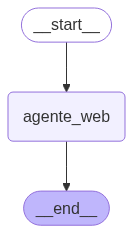

In [46]:
from IPython.display import Image, display
Image(app.get_graph().draw_mermaid_png())

In [47]:
resultado = app.invoke({"user_query": "Qual o impacto da IA na medicina?"})
print(resultado["web_answer"])

A inteligência artificial (IA) tem um impacto significativo na medicina, oferecendo benefícios como a personalização e eficiência nos cuidados de saúde, armazenamento e processamento preciso de dados, e acesso facilitado a informações cruciais para os profissionais de saúde. A IA permite a digitalização e organização eficiente de arquivos médicos, melhorando a proteção de informações sensíveis dos pacientes. Além disso, tecnologias baseadas em IA podem filtrar e acessar dados relevantes conforme necessário, auxiliando na prática médica sem comprometer a autonomia e responsabilidade profissional. 

Para mais detalhes, você pode conferir os seguintes artigos:

1. [Inteligência artificial na medicina: impactos e desafios](https://periodicorease.pro.br/rease/article/download/18024/10360/44833)
2. [Inteligência Artificial na Medicina: Histórico, Evolução e Aplicações](https://medium.com/intelig%C3%AAncia-artificial-em-medicina/a-intelig%C3%AAncia-artificial-na-medicina-hist%C3%B3rico-evolu%

# Definindo um supervisor

In [48]:
def supervisor_node(state: AgentState) -> dict:
    """
    Combina os resultados da web e de agentes científicos e formata a resposta final.

    Args:
        state (AgentState): O estado atual do agente, contendo web_answer e scientific_answer.
    Returns:
        dict: Um dicionário contendo a resposta final combinada e formatada.
    """
    web_results = state.get("web_answer", "Não foi realizada pesquisa na Web.")
    scientific_results = state.get("scientific_answer", "Não foi realizada pesquisa por artigos científicos.")

    final_answer = "## Resultados de pesquisa combinados\n\n"
    final_answer += "### Resultados da pesquisa na Web\n"
    final_answer += web_results
    final_answer += "\n\n### Resultados de Artigos Científicos\n"
    final_answer += scientific_results

    return {"final_answer": final_answer}

In [49]:
workflow = StateGraph(AgentState)

workflow.add_node("web_search", funcao_agente_web)
workflow.add_node("scientific_search", funcao_agente_cientifico)
workflow.add_node("supervisor", supervisor_node)

workflow.add_edge(START, "web_search")
workflow.add_edge("web_search", "scientific_search")
workflow.add_edge("scientific_search", "supervisor")
workflow.add_edge("supervisor", END)

app = workflow.compile()

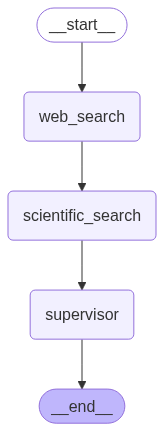

In [50]:
Image(app.get_graph().draw_mermaid_png())

In [51]:
resultado = app.invoke({"user_query": "Qual o impacto da IA na medicina?"})
print("Resultado completo:")
print(resultado)
print("\nResposta final:")
print(resultado["final_answer"])

Resultado completo:
{'user_query': 'Qual o impacto da IA na medicina?', 'web_answer': 'A inteligência artificial (IA) tem um impacto significativo na medicina, especialmente no diagnóstico médico e no tratamento de doenças. Aqui estão alguns dos principais pontos:\n\n1. **Aumento da Precisão Diagnóstica**: A IA pode fornecer análises detalhadas e identificar padrões complexos que podem ser difíceis de detectar por médicos humanos, aumentando assim a precisão dos diagnósticos. [Leia mais](https://medicinadireta.com.br/blog/inteligencia-artificial-no-diagnostico-medico/).\n\n2. **Eficiência e Velocidade**: A IA ajuda a acelerar o processo de definição de doenças, permitindo uma resposta mais rápida ao tratamento e reduzindo o tempo de espera para o início dos cuidados.\n\n3. **Detecção de Enfermidades**: A IA pode contribuir para a detecção de doenças, como as tropicais, de forma mais rápida e precisa, ajudando os profissionais de saúde a tomarem decisões eficazes. [Saiba mais](https://b

In [ ]:
def router_agent(state: AgentState) -> str:
    """
    Agente roteador que decide qual ferramenta usar (busca web ou busca científica)
    com base na pergunta do usuário, usando um agente ReAct interno.
    """
    # Define o prompt para o agente ReAct interno
    router_prompt = """
    Você é um agente roteador. Sua tarefa é decidir qual é o agente mais apropriado
    para responder à pergunta do usuário.

    Pergunta do usuário: {user_query}

    Você pode escolher entre as seguintes opções:
    - web_search: Use esta opção se a pergunta do usuário parecer exigir uma busca geral na web.
    - scientific_search: Use esta opção se a pergunta do usuário parecer exigir a busca por artigos científicos (por exemplo, no arXiv).

    Responda APENAS com o nome da opção escolhida (web_search ou scientific_search).
    """

    # Cria um agente ReAct interno para roteamento

    router_agent_instance = create_react_agent(
        model=llm,
        tools=[], # Nenhum tool externa necessária para o roteador
        prompt=router_prompt
    )

    # Invoca o agente ReAct interno com a consulta do usuário
    # Passa a user_query em um dicionário que corresponda à variável de entrada do router_prompt
    response = router_agent_instance.invoke({"messages": [("user", state["user_query"])]})

    # Analisa a resposta para obter a decisão
    # A resposta final do agente ReAct deve ser a opção escolhida
    decision = response['messages'][-1].content.strip().lower()


    if "web_search" in decision:
        return {"router_decision": "web_search"}
    elif "scientific_search" in decision:
        return {"router_decision": "scientific_search"}
    else:
        # Padrão para busca na web se a decisão não estiver clara
        return {"router_decision": "web_search"}

In [53]:
workflow = StateGraph(AgentState)

workflow.add_node("router", router_agent)
workflow.add_node("web_search", funcao_agente_web)
workflow.add_node("scientific_search", funcao_agente_cientifico)
workflow.add_node("supervisor", supervisor_node)

workflow.add_edge(START, "router")

workflow.add_conditional_edges(
    "router",
    lambda state: state['router_decision'],
    {
        "web_search": "web_search",
        "scientific_search": "scientific_search"
    }
)

workflow.add_edge("web_search", "supervisor")
workflow.add_edge("scientific_search", "supervisor")
workflow.add_edge("supervisor", END)

app = workflow.compile()

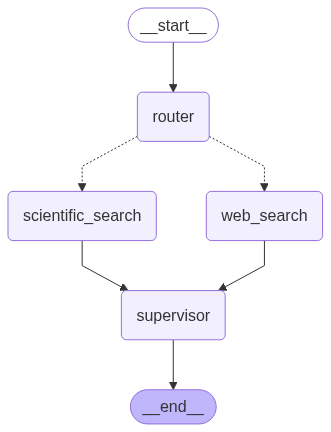

In [54]:
Image(app.get_graph().draw_mermaid_png())

In [55]:
resultado = app.invoke({"user_query": "Qual o impacto da IA na medicina? Use apenas fontes da Web"})
print("Resultado completo:")
print(resultado)
print("\nResposta final:")
print(resultado["final_answer"])

Resultado completo:
{'user_query': 'Qual o impacto da IA na medicina? Use apenas fontes da Web', 'web_answer': 'A inteligência artificial (IA) tem um impacto significativo na medicina, especialmente no diagnóstico médico e no tratamento de doenças. Aqui estão alguns artigos que discutem esse impacto:\n\n1. [Impacto Da Inteligência Artificial No Diagnóstico Médico](https://medicinadireta.com.br/blog/inteligencia-artificial-no-diagnostico-medico/): Este artigo destaca como a IA aumenta a precisão diagnóstica, fornecendo análises detalhadas e identificando padrões complexos que podem ser difíceis de detectar por médicos humanos. A IA também acelera o processo de definição de doenças, permitindo respostas mais rápidas ao tratamento.\n\n2. [Revolução da inteligência artificial: uso na saúde traz novas possibilidades](https://bvsms.saude.gov.br/revolucao-da-inteligencia-artificial-uso-na-saude-traz-novas-possibilidades/): Este artigo discute como a IA pode contribuir para a detecção de enfer

In [ ]:
resultado = app.invoke({"user_query": "Qual o impacto da IA na medicina? Use apenas fontes científicas"})
print("Resultado completo:")
print(resultado)
print("\nResposta final:")
print(resultado["final_answer"])

Resultado completo:
{'user_query': 'Qual o impacto da IA na medicina? Use apenas fontes científicas', 'scientific_answer': 'Os resultados da pesquisa sobre "IA na medicina" incluem os seguintes artigos:\n* Revealing the Parametric Knowledge of Language Models: A Unified Framework for Attribution Methods\n* Type Ia supernovae with and without blueshifted narrow Na I D lines - how different is their structure?\n* A Second Case of Variable Na I D Lines in a Highly-Reddened Type Ia Supernova (with Erratum)', 'final_answer': '## Resultados de pesquisa combinados\n\n### Resultados da pesquisa na Web\nNenhum resultado de pesquisa na web encontrado.\n\n### Resultados de Artigos Científicos\nOs resultados da pesquisa sobre "IA na medicina" incluem os seguintes artigos:\n* Revealing the Parametric Knowledge of Language Models: A Unified Framework for Attribution Methods\n* Type Ia supernovae with and without blueshifted narrow Na I D lines - how different is their structure?\n* A Second Case of 

In [ ]:
resultado = app.invoke({"user_query": "Qual o impacto da IA na medicina?"})
print("Resultado completo:")
print(resultado)
print("\nResposta final:")
print(resultado["final_answer"])

Resultado completo:
{'user_query': 'Qual o impacto da IA na medicina?', 'web_answer': 'A IA está transformando o futuro da medicina, proporcionando melhores cuidados para os pacientes e otimizando o trabalho dos profissionais de saúde. Seu impacto continuará a crescer nos próximos anos, moldando um futuro mais eficiente, acessível e personalizado para a saúde global. A IA pode trazer impactos diretos na quantidade de vidas salvas, principalmente quando se trata de oncologia. A taxa de sobrevivência de 5 anos para todos os tipos de câncer combinados aumentou de 50% na década de 1970 para cerca de 70% na atualidade, em países desenvolvidos. A IA tem se mostrado uma ferramenta poderosa para otimizar o tempo dos médicos e melhorar a precisão dos diagnósticos.\n\nPara mais informações, você pode acessar os seguintes links:\n* [Como a IA Está a Mudar o Futuro da Medicina - L. R. Neves](https://lrneves.com/como-a-ia-esta-a-mudar-o-futuro-da-medicina/)\n* [Inteligência artificial na medicina: 